In [294]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [295]:
df = pd.read_csv('../Data/data.csv')

In [296]:
df.fillna(method='ffill', inplace=True)

C:\Users\sachi\AppData\Local\Temp\ipykernel_7696\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [297]:
df.isnull().sum()

Agreement Number                         0
Disbursement Date                        0
Loan Amount                              0
Number of Ornaments                      0
Gross Auction Weight of Ornaments(gm)    0
Auction Date                             0
Auction Place                            0
Branch Address                           0
dtype: int64

In [298]:
df.head()

,Agreement Number,Disbursement Date,Loan Amount,Number of Ornaments,Gross Auction Weight of Ornaments(gm),Auction Date,Auction Place,Branch Address
0,PV97SGL7830716,18-May-23,80099.0,1,21.1,12-Aug-24,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D..."
1,PV97SGL7844024,19-May-23,57799.0,1,14.0,12-Aug-24,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D..."
2,PV97SGL7918636,25-May-23,19599.0,1,5.2,12-Aug-24,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D..."
3,PV97SGL8121108,13-Jun-23,48258.0,1,11.8,12-Aug-24,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D..."
4,PV97SGL8143786,15-Jun-23,145174.0,1,35.5,12-Aug-24,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D..."


In [299]:
df_historical = pd.read_csv('../Data/XAU_INR Historical Data.csv')

In [300]:
df_historical

,Date,Price,Open,High,Low,Vol.,Change %
0,08-10-2024,"221,583","221,927","222,403","221,188",NaN,-0.14%
1,07-10-2024,"221,887","222,775","223,425","221,568",NaN,-0.47%
2,04-10-2024,"222,933","223,121","224,308","221,197",NaN,-0.04%
3,03-10-2024,"223,030","223,169","223,686","221,724",NaN,0.00%
4,02-10-2024,"223,032","223,496","223,642","221,771",NaN,-0.15%
...,...,...,...,...,...,...,...
712,14-01-2022,"134,749","134,837","135,604","134,409",NaN,-0.01%
713,13-01-2022,"134,759","134,776","135,199","133,978",NaN,0.04%
714,12-01-2022,"134,708","134,464","134,934","134,037",NaN,0.24%
715,11-01-2022,"134,387","133,359","134,574","133,138",NaN,0.80%


In [301]:
df_historical.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [302]:
df.columns

Index(['Agreement Number', 'Disbursement Date', 'Loan Amount',
       'Number of Ornaments', 'Gross Auction Weight of Ornaments(gm)',
       'Auction Date', 'Auction Place', 'Branch Address'],
      dtype='object')

In [303]:
numerical_columns = ['Loan Amount','Number of Ornaments', 'Gross Auction Weight of Ornaments(gm)']

In [304]:
plt.rcParams.update({'font.size': 10})

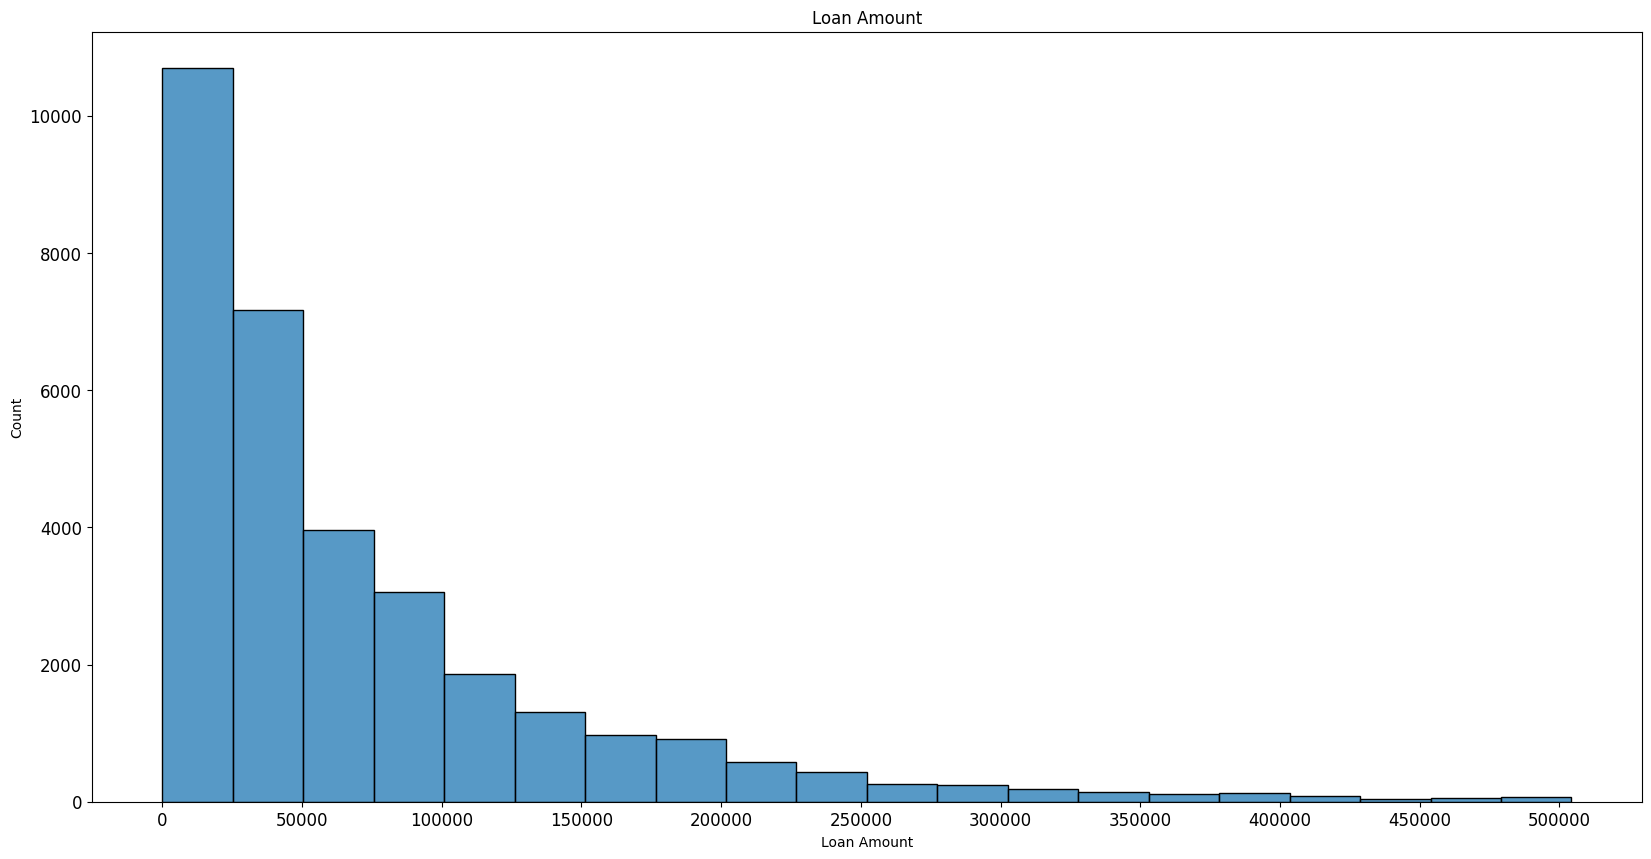

In [305]:
filtered_df = df[df['Loan Amount'] < df['Loan Amount'].quantile(0.99)]

plt.figure(figsize=(20, 10))
sns.histplot(filtered_df['Loan Amount'], bins=20)
plt.title('Loan Amount')
plt.ticklabel_format(style='plain')
plt.xticks(np.arange(0, max(filtered_df['Loan Amount'])+1, 50000))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.show()

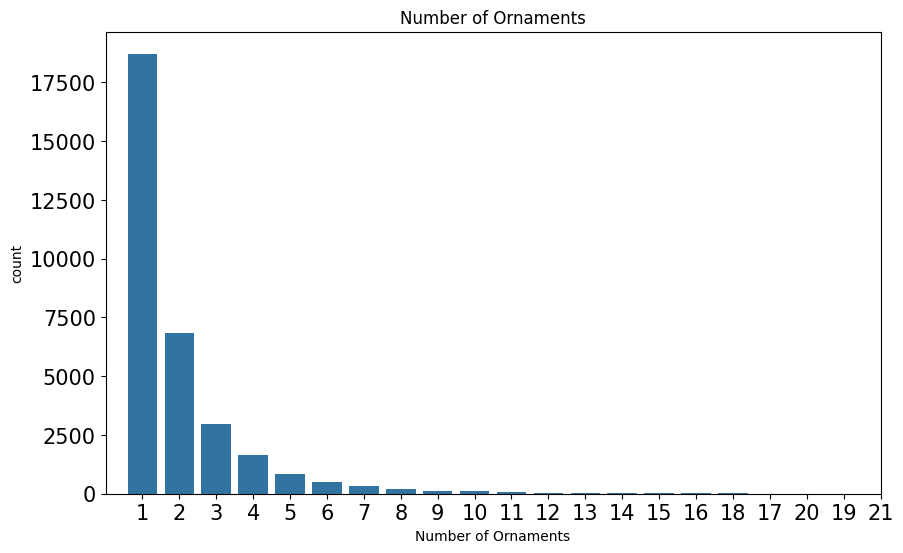

In [306]:
# 5. Loan Cycle
plt.figure(figsize=(10, 6))
sns.countplot(x='Number of Ornaments', data=df, order=df['Number of Ornaments'].value_counts().index)
plt.title('Number of Ornaments')
plt.xlim(-1,20)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.show()

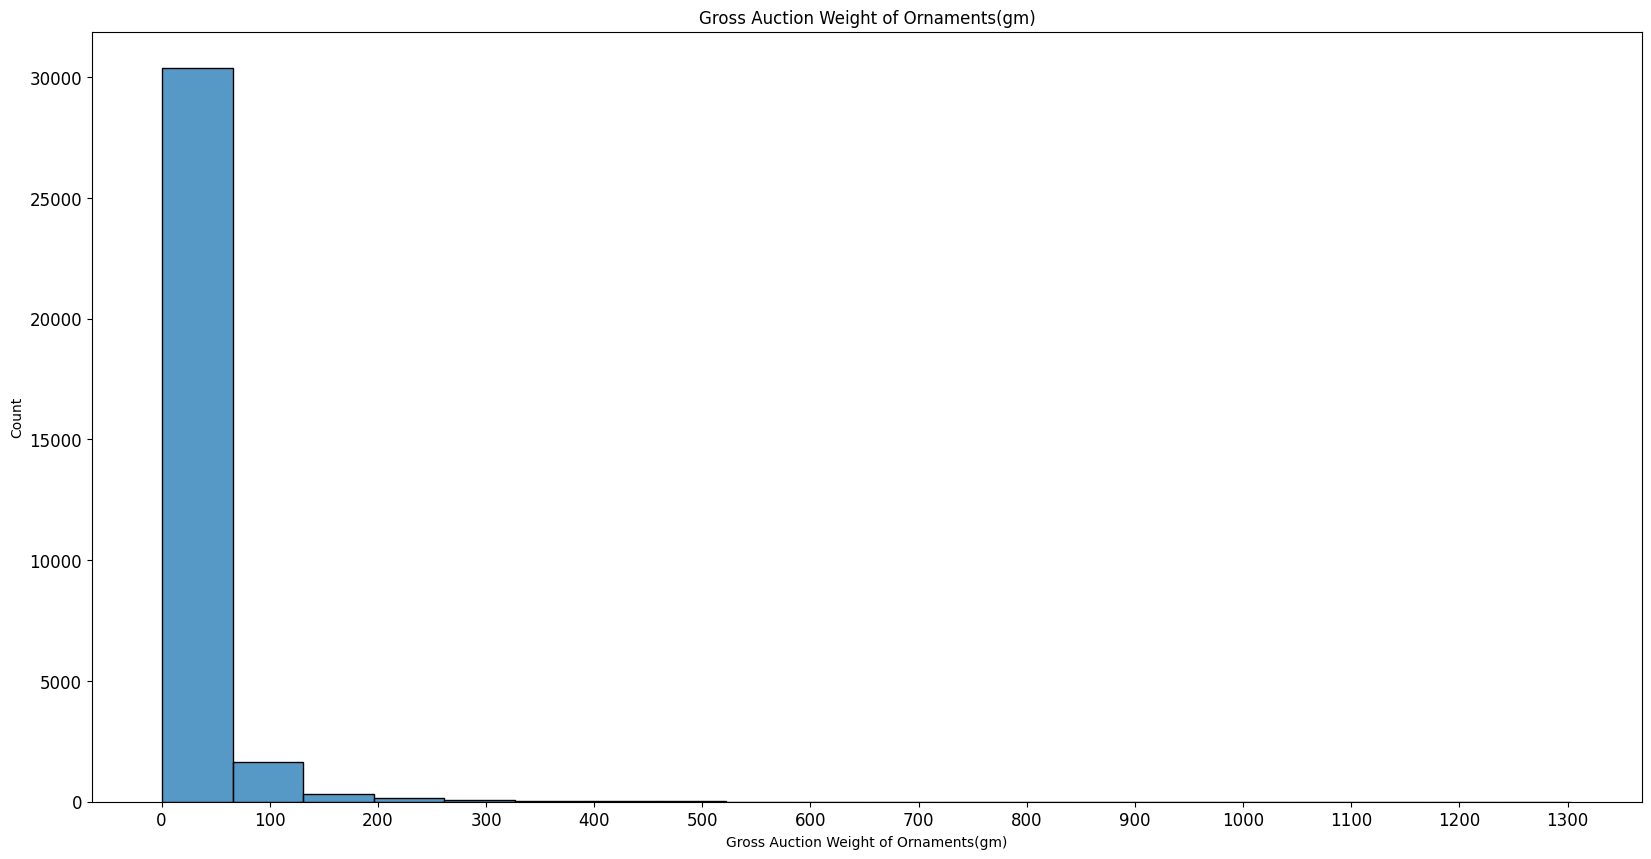

In [307]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Gross Auction Weight of Ornaments(gm)'], bins=20)
plt.title('Gross Auction Weight of Ornaments(gm)')
plt.ticklabel_format(style='plain')
plt.xticks(np.arange(0, max(df['Gross Auction Weight of Ornaments(gm)'])+1, 100))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.show()

- value and grammage correlation
- original value of gold on disbursement date
- value of gold on auction date
- original value vs loan amount

In [308]:
df['Loan Amount'].corr(df['Gross Auction Weight of Ornaments(gm)'])

np.float64(0.8613470226275941)

In [309]:
df['Disbursement Date'] = pd.to_datetime(df['Disbursement Date'], format='%d-%b-%y')
# df['Disbursement Date'] = df['Disbursement Date'].dt.strftime('%d-%m-%Y')

In [310]:
df['Auction Date'] = pd.to_datetime(df['Auction Date'], format='%d-%b-%y',errors='coerce')
# df['Auction Date'] = df['Auction Date'].dt.strftime('%d-%m-%Y')

In [311]:
df.head()

,Agreement Number,Disbursement Date,Loan Amount,Number of Ornaments,Gross Auction Weight of Ornaments(gm),Auction Date,Auction Place,Branch Address
0,PV97SGL7830716,2023-05-18,80099.0,1,21.1,2024-08-12,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D..."
1,PV97SGL7844024,2023-05-19,57799.0,1,14.0,2024-08-12,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D..."
2,PV97SGL7918636,2023-05-25,19599.0,1,5.2,2024-08-12,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D..."
3,PV97SGL8121108,2023-06-13,48258.0,1,11.8,2024-08-12,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D..."
4,PV97SGL8143786,2023-06-15,145174.0,1,35.5,2024-08-12,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D..."


In [312]:
df['Disbursement Date'] = pd.to_datetime(df['Disbursement Date'], format='%d-%m-%y')
df['Auction Date'] = pd.to_datetime(df['Auction Date'], format='%d-%m-%y')

In [313]:
df.head()

,Agreement Number,Disbursement Date,Loan Amount,Number of Ornaments,Gross Auction Weight of Ornaments(gm),Auction Date,Auction Place,Branch Address
0,PV97SGL7830716,2023-05-18,80099.0,1,21.1,2024-08-12,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D..."
1,PV97SGL7844024,2023-05-19,57799.0,1,14.0,2024-08-12,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D..."
2,PV97SGL7918636,2023-05-25,19599.0,1,5.2,2024-08-12,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D..."
3,PV97SGL8121108,2023-06-13,48258.0,1,11.8,2024-08-12,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D..."
4,PV97SGL8143786,2023-06-15,145174.0,1,35.5,2024-08-12,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D..."


In [314]:

df_historical['Date'] = pd.to_datetime(df_historical['Date'],format='%d-%m-%Y')

In [315]:
df_merged = pd.merge(df, df_historical[['Date', 'Price']], left_on='Auction Date', right_on='Date', how='left')

In [316]:
df_merged = df_merged.rename(columns={'Price': 'OnAuctionDate(Troy ounces)'})
df_merged = df_merged.drop(columns=['Date'])

In [317]:
df_merged = pd.merge(df_merged, df_historical[['Date', 'Price']], left_on='Disbursement Date', right_on='Date', how='left')

In [318]:
df_merged = df_merged.rename(columns={'Price': 'OnDisbursementDate(Troy ounces)'})
df_merged = df_merged.drop(columns=['Date'])

In [319]:
df_merged

,Agreement Number,Disbursement Date,Loan Amount,Number of Ornaments,Gross Auction Weight of Ornaments(gm),Auction Date,Auction Place,Branch Address,OnAuctionDate(Troy ounces),OnDisbursementDate(Troy ounces)
0,PV97SGL7830716,2023-05-18,80099.0,1,21.1,2024-08-12,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D...","207,289","161,872"
1,PV97SGL7844024,2023-05-19,57799.0,1,14.0,2024-08-12,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D...","207,289","163,882"
2,PV97SGL7918636,2023-05-25,19599.0,1,5.2,2024-08-12,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D...","207,289","160,585"
3,PV97SGL8121108,2023-06-13,48258.0,1,11.8,2024-08-12,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D...","207,289","159,786"
4,PV97SGL8143786,2023-06-15,145174.0,1,35.5,2024-08-12,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D...","207,289","160,310"
...,...,...,...,...,...,...,...,...,...,...
32565,PGC4SGL8396436,2023-07-08,15299.0,1,4.1,2024-09-13,YELLANDU - BUGGAVAGU,"H NO 1-1-58, FGROUND FLOOR, ON MAIN ROAD, YELL...","216,215",NaN
32566,PER4SGL8382233,2023-07-07,15299.0,1,3.9,2024-09-13,Zahirabad - RTC Bus Stand,"D No. 2--13/1, 1st Floor, Pallod Complex, Subh...","216,215","159,051"
32567,PER4SGL8454082,2023-07-13,27299.0,1,9.0,2024-09-13,Zahirabad - RTC Bus Stand,"D No. 2--13/1, 1st Floor, Pallod Complex, Subh...","216,215","160,810"
32568,PER4SGL8479949,2023-07-15,23099.0,1,5.9,2024-09-13,Zahirabad - RTC Bus Stand,"D No. 2--13/1, 1st Floor, Pallod Complex, Subh...","216,215",NaN


In [320]:
df_merged['OnAuctionDate(Troy ounces)'] = df_merged['OnAuctionDate(Troy ounces)'].str.replace(',', '')

df_merged['OnAuctionDate(Troy ounces)'] = pd.to_numeric(df_merged['OnAuctionDate(Troy ounces)'])
df_merged['OnAuctionDate(Troy ounces)'] = df_merged['OnAuctionDate(Troy ounces)'] * 0.916
df_merged['OnDisbursementDate(Troy ounces)'] = df_merged['OnDisbursementDate(Troy ounces)'].str.replace(',', '')

df_merged['OnDisbursementDate(Troy ounces)'] = pd.to_numeric(df_merged['OnDisbursementDate(Troy ounces)'])
df_merged['OnDisbursementDate(Troy ounces)'] = df_merged['OnDisbursementDate(Troy ounces)'] * 0.916

# Convert Gross Auction Weight of Ornaments(gm) to numeric as well
df_merged['Gross Auction Weight of Ornaments(gm)'] = pd.to_numeric(df_merged['Gross Auction Weight of Ornaments(gm)'])
df_merged['Loan Amount'] = pd.to_numeric(df_merged['Loan Amount'])


In [321]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32570 entries, 0 to 32569
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Agreement Number                       32570 non-null  object        
 1   Disbursement Date                      32570 non-null  datetime64[ns]
 2   Loan Amount                            32570 non-null  float64       
 3   Number of Ornaments                    32570 non-null  int64         
 4   Gross Auction Weight of Ornaments(gm)  32570 non-null  float64       
 5   Auction Date                           28130 non-null  datetime64[ns]
 6   Auction Place                          32570 non-null  object        
 7   Branch Address                         32570 non-null  object        
 8   OnAuctionDate(Troy ounces)             19922 non-null  float64       
 9   OnDisbursementDate(Troy ounces)        27730 non-null  float6

In [322]:
# Convert priceonauction from troy ounces to per gram
df_merged['PricePerGramOnAuctionDate'] = df_merged['OnAuctionDate(Troy ounces)'] / 31.1035

# Multiply by Gross Auction Weight of Ornaments(gm)
df_merged['ValueOnAuctionDate'] = df_merged['PricePerGramOnAuctionDate'] * df_merged['Gross Auction Weight of Ornaments(gm)']
df_merged

,Agreement Number,Disbursement Date,Loan Amount,Number of Ornaments,Gross Auction Weight of Ornaments(gm),Auction Date,Auction Place,Branch Address,OnAuctionDate(Troy ounces),OnDisbursementDate(Troy ounces),PricePerGramOnAuctionDate,ValueOnAuctionDate
0,PV97SGL7830716,2023-05-18,80099.0,1,21.1,2024-08-12,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D...",189876.724,148274.752,6104.673879,128808.618850
1,PV97SGL7844024,2023-05-19,57799.0,1,14.0,2024-08-12,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D...",189876.724,150115.912,6104.673879,85465.434308
2,PV97SGL7918636,2023-05-25,19599.0,1,5.2,2024-08-12,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D...",189876.724,147095.860,6104.673879,31744.304172
3,PV97SGL8121108,2023-06-13,48258.0,1,11.8,2024-08-12,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D...",189876.724,146363.976,6104.673879,72035.151774
4,PV97SGL8143786,2023-06-15,145174.0,1,35.5,2024-08-12,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D...",189876.724,146843.960,6104.673879,216715.922710
...,...,...,...,...,...,...,...,...,...,...,...,...
32565,PGC4SGL8396436,2023-07-08,15299.0,1,4.1,2024-09-13,YELLANDU - BUGGAVAGU,"H NO 1-1-58, FGROUND FLOOR, ON MAIN ROAD, YELL...",198052.940,NaN,6367.545132,26106.935039
32566,PER4SGL8382233,2023-07-07,15299.0,1,3.9,2024-09-13,Zahirabad - RTC Bus Stand,"D No. 2--13/1, 1st Floor, Pallod Complex, Subh...",198052.940,145690.716,6367.545132,24833.426013
32567,PER4SGL8454082,2023-07-13,27299.0,1,9.0,2024-09-13,Zahirabad - RTC Bus Stand,"D No. 2--13/1, 1st Floor, Pallod Complex, Subh...",198052.940,147301.960,6367.545132,57307.906184
32568,PER4SGL8479949,2023-07-15,23099.0,1,5.9,2024-09-13,Zahirabad - RTC Bus Stand,"D No. 2--13/1, 1st Floor, Pallod Complex, Subh...",198052.940,NaN,6367.545132,37568.516276


In [323]:
df_merged['PricePerGramOnDisbursementDate'] = df_merged['OnDisbursementDate(Troy ounces)'] / 31.1035

# Multiply by Gross Auction Weight of Ornaments(gm)
df_merged['ValueOnDisbursementDate'] = df_merged['PricePerGramOnDisbursementDate'] * df_merged['Gross Auction Weight of Ornaments(gm)']

In [324]:
df_merged.head()

,Agreement Number,Disbursement Date,Loan Amount,Number of Ornaments,Gross Auction Weight of Ornaments(gm),Auction Date,Auction Place,Branch Address,OnAuctionDate(Troy ounces),OnDisbursementDate(Troy ounces),PricePerGramOnAuctionDate,ValueOnAuctionDate,PricePerGramOnDisbursementDate,ValueOnDisbursementDate
0,PV97SGL7830716,2023-05-18,80099.0,1,21.1,2024-08-12,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D...",189876.724,148274.752,6104.673879,128808.618850,4767.140418,100586.662826
1,PV97SGL7844024,2023-05-19,57799.0,1,14.0,2024-08-12,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D...",189876.724,150115.912,6104.673879,85465.434308,4826.335043,67568.690598
2,PV97SGL7918636,2023-05-25,19599.0,1,5.2,2024-08-12,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D...",189876.724,147095.860,6104.673879,31744.304172,4729.238189,24592.038581
3,PV97SGL8121108,2023-06-13,48258.0,1,11.8,2024-08-12,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D...",189876.724,146363.976,6104.673879,72035.151774,4705.707589,55527.349552
4,PV97SGL8143786,2023-06-15,145174.0,1,35.5,2024-08-12,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. D...",189876.724,146843.960,6104.673879,216715.922710,4721.139422,167600.449467


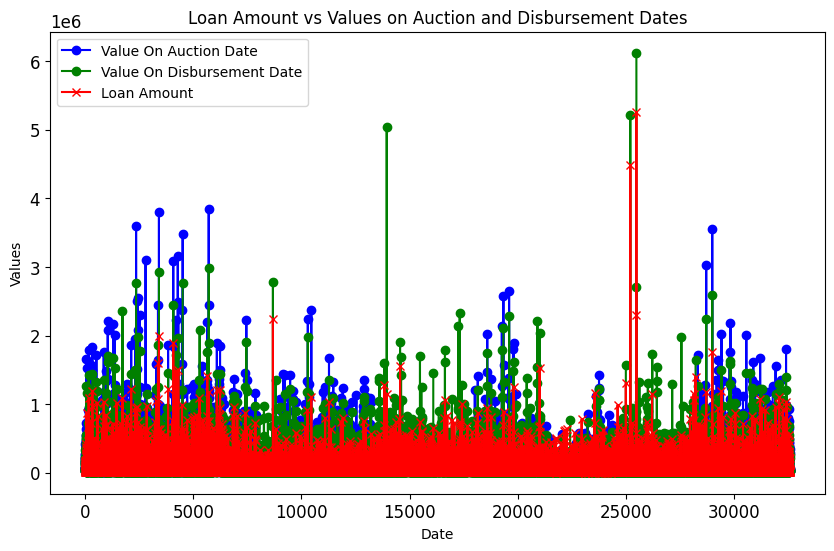

In [325]:
import matplotlib.pyplot as plt

# Assuming you have a 'Date' column
# df_merged.set_index('Date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df_merged.index, df_merged['ValueOnAuctionDate'], label='Value On Auction Date', color='blue', marker='o')
plt.plot(df_merged.index, df_merged['ValueOnDisbursementDate'], label='Value On Disbursement Date', color='green', marker='o')
plt.plot(df_merged.index, df_merged['Loan Amount'], label='Loan Amount', color='red', marker='x')

plt.title('Loan Amount vs Values on Auction and Disbursement Dates')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()


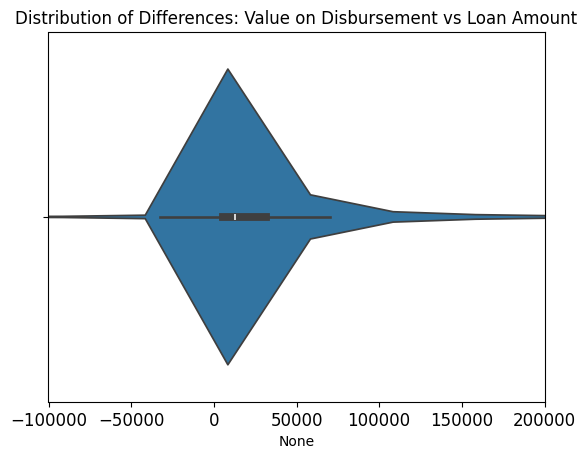

In [334]:
difference = df_merged['ValueOnDisbursementDate'] - df_merged['Loan Amount']

# Violin Plot
sns.violinplot(x=difference)
plt.title('Distribution of Differences: Value on Disbursement vs Loan Amount')
plt.xlim(-100000,200000)
# plt.ticklabel_format(style='plain')

plt.show()

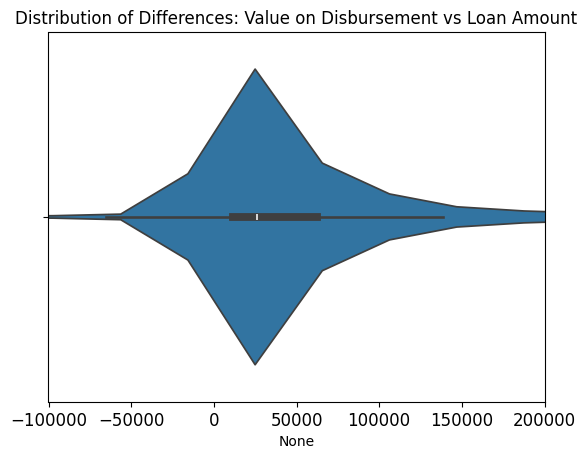

In [335]:
difference = df_merged['ValueOnAuctionDate'] - df_merged['Loan Amount']

# Violin Plot
sns.violinplot(x=difference)
plt.title('Distribution of Differences: Value on Disbursement vs Loan Amount')
plt.xlim(-100000,200000)
# plt.ticklabel_format(style='plain')

plt.show()